#### latitude,longitude,elevation,utc_offset_seconds,timezone,timezone_abbreviation
#### 43.625,79.375,640.0,-14400,America/New_York,GMT-4


In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Columns

In [148]:
df = pd.read_csv("dataset.csv")
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1636 entries, 0 to 1635
Data columns (total 71 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   time                                             1636 non-null   object 
 1   weather_code (wmo code)                          1636 non-null   int64  
 2   temperature_2m_max (°C)                          1636 non-null   float64
 3   temperature_2m_min (°C)                          1636 non-null   float64
 4   apparent_temperature_max (°C)                    1636 non-null   float64
 5   apparent_temperature_min (°C)                    1636 non-null   float64
 6   sunrise (iso8601)                                1636 non-null   object 
 7   sunset (iso8601)                                 1636 non-null   object 
 8   daylight_duration (s)                            1636 non-null   float64
 9   sunshine_duration (s)         

In [ ]:
# Total unique output weather codes
len(df["weather_code (wmo code)"].unique())

19

### Do we need sunset and sunrise times? another hassle to encode timings into numerical data

In [149]:
df = df.drop(["sunrise (iso8601)", "sunset (iso8601)"], axis =1)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1636 entries, 0 to 1635
Data columns (total 69 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   time                                             1636 non-null   object 
 1   weather_code (wmo code)                          1636 non-null   int64  
 2   temperature_2m_max (°C)                          1636 non-null   float64
 3   temperature_2m_min (°C)                          1636 non-null   float64
 4   apparent_temperature_max (°C)                    1636 non-null   float64
 5   apparent_temperature_min (°C)                    1636 non-null   float64
 6   daylight_duration (s)                            1636 non-null   float64
 7   sunshine_duration (s)                            1636 non-null   float64
 8   uv_index_max ()                                  1636 non-null   float64
 9   uv_index_clear_sky_max ()     

In [150]:
# Dropping columns who have more than 50% NaN values
threshold = len(df) * 0.5  
df = df.dropna(axis=1, thresh=threshold)

df.to_csv("temp.csv", index = False)


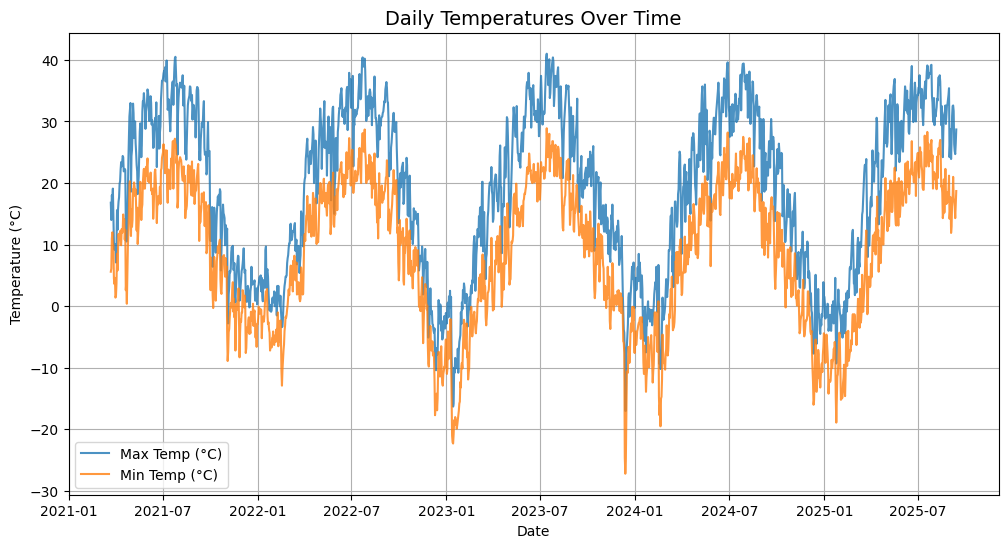

In [151]:
df = pd.read_csv("temp.csv")
df["time"] = pd.to_datetime(df["time"])

plt.figure(figsize=(12,6))
plt.plot(df["time"], df["temperature_2m_max (°C)"], label="Max Temp (°C)", alpha=0.8)
plt.plot(df["time"], df["temperature_2m_min (°C)"], label="Min Temp (°C)", alpha=0.8)

plt.title("Daily Temperatures Over Time", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# converting month and year into cosine and sine
import pandas as pd
import numpy as np

df = pd.read_csv("temp.csv")
df["time"] = pd.to_datetime(df["time"])

df["year"] = df["time"].dt.year
df["month"] = df["time"].dt.month
df["day_of_month"] = df["time"].dt.day
df["day_of_week"] = df["time"].dt.dayofweek
df["day_of_year"] = df["time"].dt.dayofyear

# Periodic features for month (1-12)
df["month_sin"] = np.sin(2 * np.pi * df["month"] / 12)
df["month_cos"] = np.cos(2 * np.pi * df["month"] / 12)

# Periodic features for year (1-365)
df["year_sin"] = np.sin(2 * np.pi * df["day_of_year"] / 365.25)
df["year_cos"] = np.cos(2 * np.pi * df["day_of_year"] / 365.25)



In [153]:
df.to_csv("final.csv", index = False)

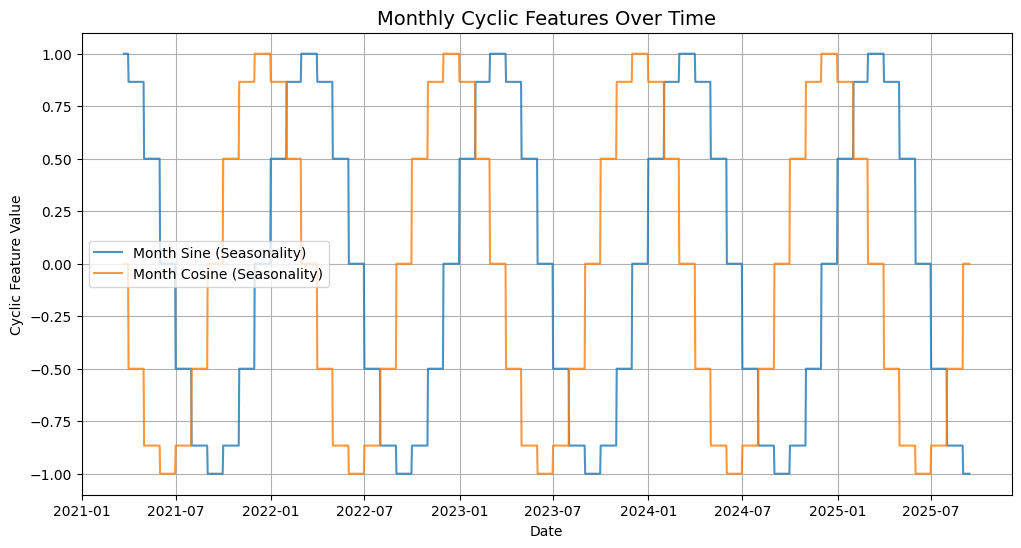

In [154]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV
df = pd.read_csv("final.csv")
df["time"] = pd.to_datetime(df["time"])

plt.figure(figsize=(12,6))

plt.plot(df["time"], df["month_sin"], label="Month Sine (Seasonality)", alpha=0.8)
plt.plot(df["time"], df["month_cos"], label="Month Cosine (Seasonality)", alpha=0.8)

plt.title("Monthly Cyclic Features Over Time", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Cyclic Feature Value")
plt.legend()
plt.grid(True)
plt.show()


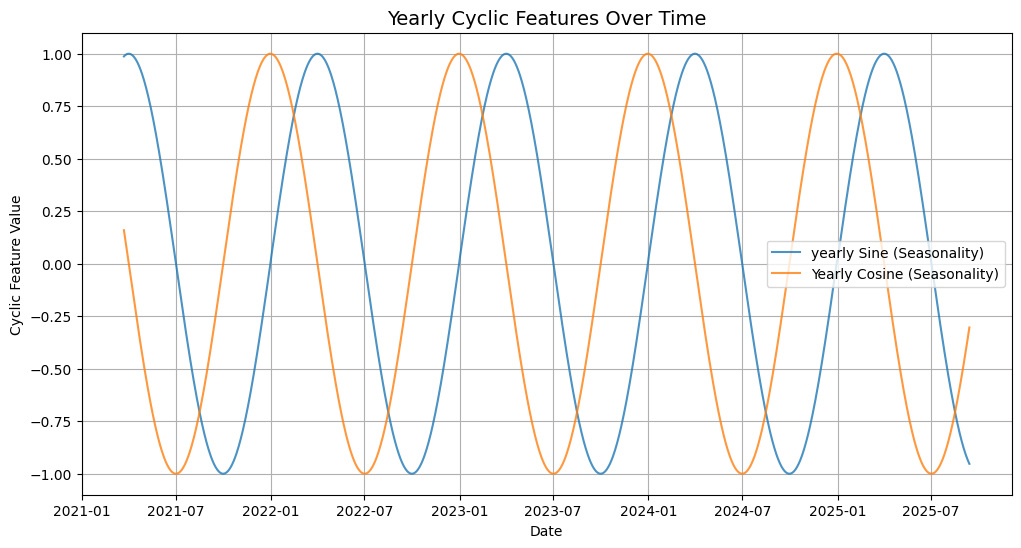

In [155]:
import pandas as pd

# Load CSV
df = pd.read_csv("final.csv")
df["time"] = pd.to_datetime(df["time"])

plt.figure(figsize=(12,6))

plt.plot(df["time"], df["year_sin"], label="yearly Sine (Seasonality)", alpha=0.8)
plt.plot(df["time"], df["year_cos"], label="Yearly Cosine (Seasonality)", alpha=0.8)

plt.title("Yearly Cyclic Features Over Time", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Cyclic Feature Value")
plt.legend()
plt.grid(True)
plt.show()
